## Multiple Linear Regression on E-Commerce dataset

The dataset can be fetched from [Kaggle](https://www.kaggle.com/datasets/srolka/ecommerce-customers).  
This mini-project demonstrates the usage of scikit-learn library to build linear regression model on e-commerce user behaviour data.  
The dataset contains time spent by users on its website and apps, amount spent in making purchases on the platforms. It also contains email, postal address, length of the membership of each user.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customers = pd.read_csv('data/ecommerce_customers/Ecommerce Customers.csv')

In [3]:
customers.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


There is a very minor difference between the mean and median of each numerical feature.  
This implies that the data is not skewed.

In [4]:
#customer.describe()
customers.describe().iloc[[1,5],:]

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
mean,33.053194,12.052488,37.060445,3.533462,499.314038
50%,33.082008,11.983231,37.069367,3.533975,498.887875


From the info() output, we can see that there are no NULL values and the data-type of each feature is consistent with the values they contain.

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Analysis

### 1. Is there any relationship/trend between time spent on browsing the website (in minutes) and Yearly spendings (in dollars) of the customer?

There seems to be no correlation between time spent on website and yearly spendings.

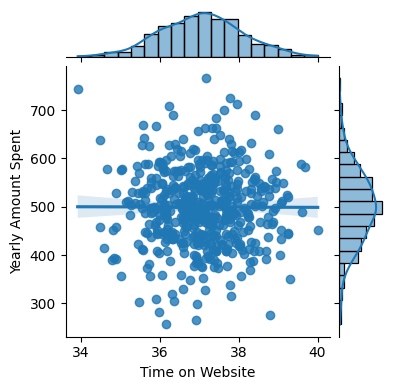

In [6]:
#set figure size
sns.jointplot(x=customers['Time on Website'], y=customers['Yearly Amount Spent'], kind = 'reg', height = 4)
plt.show()

### 2. Visualize relationship between 'time spent on app' and 'yearly spendings'.

There seems to be a positive linear relationship between time spent on app and yearly spendings of customers.

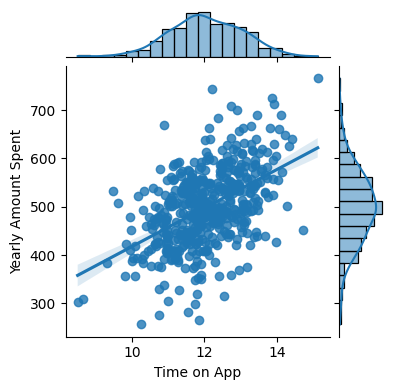

In [7]:
sns.jointplot(x=customers['Time on App'], y = customers['Yearly Amount Spent'], kind = 'reg', height = 4)
plt.show()

### 3. Visualize relationship between all numeric variables of customers

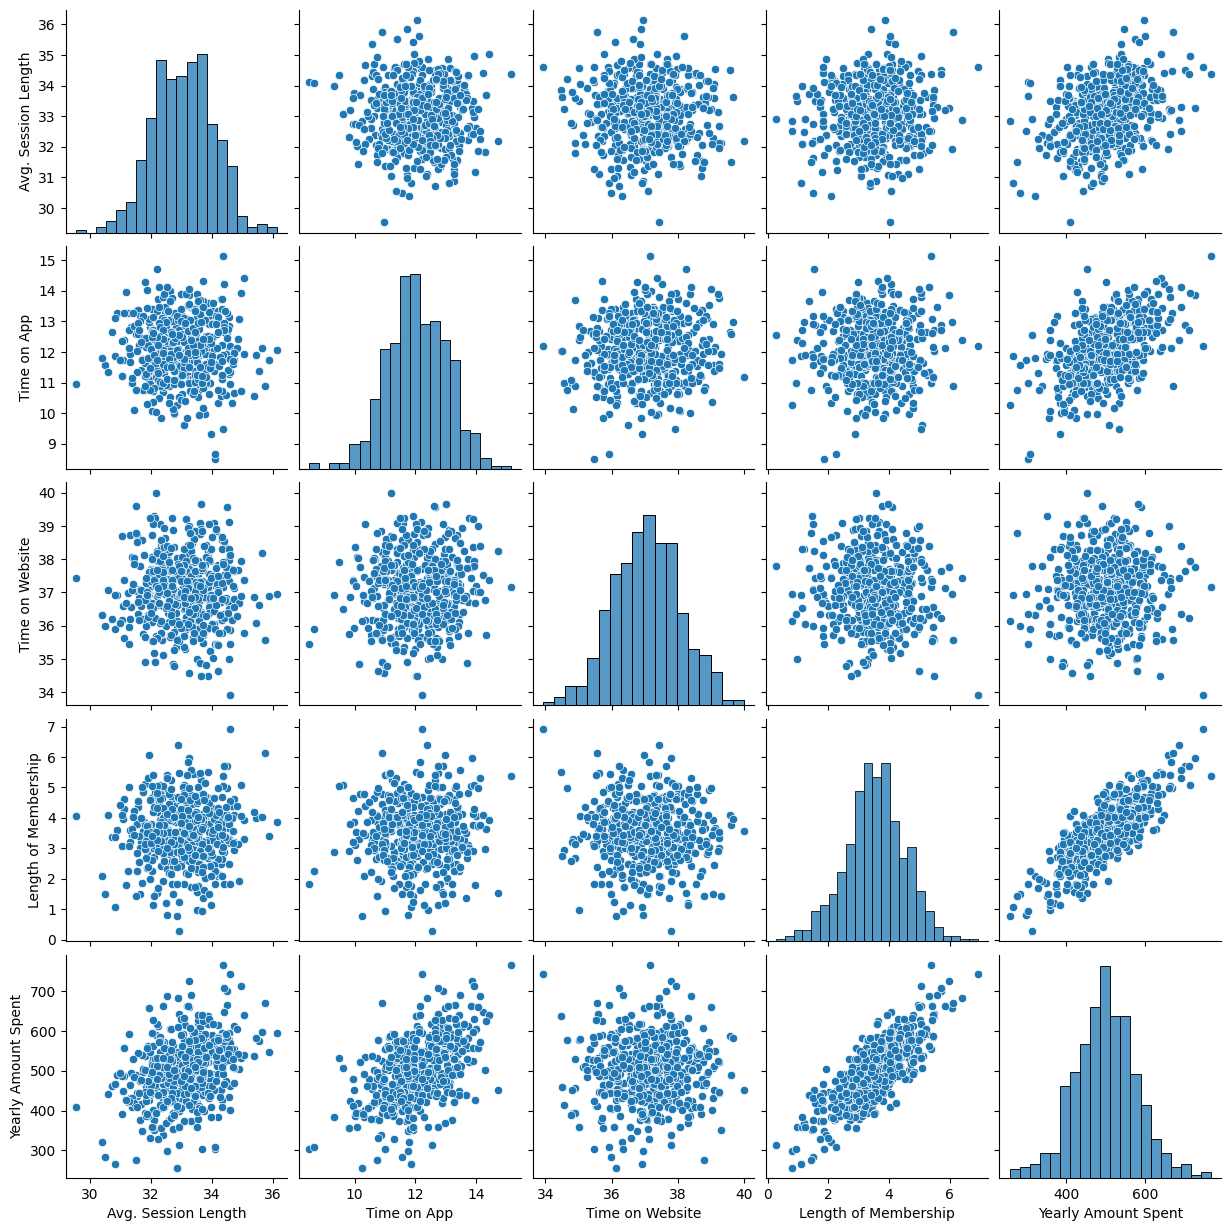

In [8]:
sns.pairplot(customers)
plt.show()

- There is a strong positive linear relationship between customers' length of membership on the platform and their yearly spendings. Customers with long membership subscriptions tend to spend more on the platform.  
- There is also linear positive relationship, although not quite strong, between time spent on app and yearly spendings.

### Correlation coeffcient between variables

In [9]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


- Correlation coefficient r between 'length of membership' and yearly spending is ~ 0.81, confirming earlier observation of strong positive linear relationship.  
- r = 0.499 for time spent on app and yearly spendings, confirming earlier observation of a weak, linear positive relationship.

#### A linear plot between Membership length and Yearly spendings

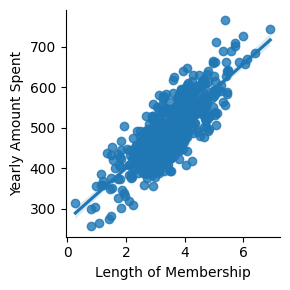

In [10]:
sns.lmplot(x='Length of Membership', y = 'Yearly Amount Spent', data = customers, height = 3)
plt.show()

### Splitting the dataset

I have split the dataset into training and test samples in 70:30 ratio.

In [11]:
#all column names
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
#select only numeric features
X = customers[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']]
Y = customers['Yearly Amount Spent']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size = 0.3, random_state = 101)

### Training the model

Mathematically, this linear regression model can be written as: 
<br>
<br>
$YearlySpending(dollars) = (w_0 * AvgSessionLength) + (w_1 * TimeOnApp) + (w_2 * TimeOnWebsite) + (w_3 * MembershipLength)$


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train, Y_train)

LinearRegression()

### Making predictions

In [26]:
#lm.predict() returns a numpy 1-d array of values computed by model
predictions = lm.predict(X_test)

In [19]:
#name of all features in X- to be used in naming X-axis on subplots below
feature_name = X_test.columns.values.tolist()

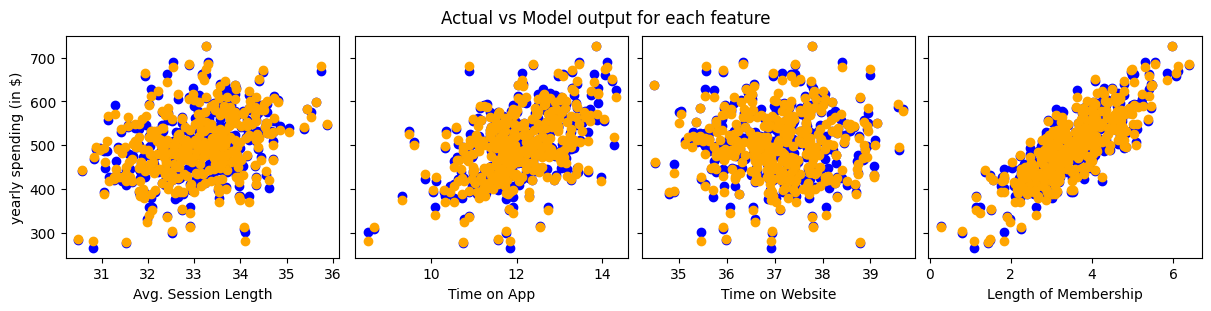

In [20]:
#Actual output vs model output on training samples

#4 subplots- one for each feature of X_ dataframe.
fig, ax = plt.subplots(1,4, constrained_layout = True, sharey = True, figsize = (12, 3))

for i in range(len(ax)):
    #scatter plot with original data
    ax[i].scatter(X_test.iloc[:,i], Y_test, c = "blue")
    #scatter plot with model output
    ax[i].scatter(X_test.iloc[:,i], predictions, c = "orange")
    #subplot title
    ax[i].set_xlabel(feature_name[i])

#set y axis label
ax[0].set_ylabel('yearly spending (in $)')

#set title for entire figure
fig.suptitle('Actual vs Model output for each feature')

plt.show()

From a visual perspective, the model fits the data quite well!  
The predictions made on test samples with good accuracy.

### Evaluation metrics

In [21]:
from sklearn import metrics

### Residuals

As mentioned above, the predicted values have been computed using the model:  
<br>
<br>
$YearlySpending(dollars) = (w_0 * AvgSessionLength) + (w_1 * TimeOnApp) + (w_2 * TimeOnWebsite) + (w_3 * MembershipLength)$

#### And:  

$Residual = actual\_value - predicted\_value$  

#### Here, 

$Residual = Y\_test[i] - predictions[i]$  

- Mean Absolute Error implies taking absolute value of error (or residual), sum up for all n observations and find mean.  
- Mean Squared Error implies taking square of residuals for all observations and finding the average.  
- Root mean squared error implies finding the square root of the Mean Squared Error.

In [22]:
print('MAE: ', metrics.mean_absolute_error(Y_test, predictions))
print('MSE: ', metrics.mean_squared_error(Y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE:  8.27722410558531
MSE:  109.36337929836603
RMSE:  10.457694741116038


### How to interpret coefficients of the features (i.e. the trained parameters)

In [23]:
customers_coeff = pd.DataFrame(lm.coef_, X.columns)
customers_coeff.columns = ['Coefficient']
customers_coeff

,Coefficient
Avg. Session Length,25.114639
Time on App,39.022188
Time on Website,0.767136
Length of Membership,62.247287


#### Re-writing the model equation from above:  

$Predicted\_Spending(\$) = (25.11 * AvgSessionLength) + (39.02 * app\_time) + (0.77 * website\_time) + (62.24 * MembershipLength)$

Keeping all other features = 0,

- If the average session length increases by 1 unit, user spendings approximately increase by around \$25.11 yearly.  
- If time on app increases by 1 unit, user spendings approximately increase by \$39.  
- If time spent browsing on website increases by 1 unit, yearly spendings increase by about \$0.76.  
- One unit increase in length of membership causes about \$62.24 increase in spendings.

### Conclusion

- Browsing products on mobile app seem to cause more yearly spendings. So, the company can focus on improving user experience, customer service through the app.  
- Time spent on websites produce minimal effect on yearly spendings. The company definitely incurs operational cost for the website. So, it can also focus on improving the website experience to increase user engagement.  
- Another thing to note is that, average time spent on websites (\~37 minutes) is far more than average spent on mobile apps (\~ 12 minutes). Yet, websites do not affect yearly spendings of the customers. This is something to be worked on...  
- Length of membership turns out to be the number one factor in affecting yearly spendings. Steps can be taken to improve the membership plans like offering limited-time deal of reduced yearly subscription plan, adding low-price tiers etc.  
